# 2.3 Bode plots

## 2.3.1 The Phasor method review

Recall the Phasor method for steady state analysis  
  
$$output\;phasor=H(s)\cdot input\;phasor$$  
where $s=j\omega$ for steady state AC analysis and $s=0$ for steady state DC analysis

## 2.3.2 Example system

Let's consider the system shown in the figure below  
We will create a transfer function for the velocity in the x direction as the block slides along the board  
Given that the vertical displacement of the board is very small, the experiment will be considered a one dimensional problem,  
The block will slide along the board as the hands are moved up and down in a sinusiodal fashion  
The sinusiodal motion will create a sinusiodal input Force  
Of course we are ignoring static friction, indeed we are assuming Stokes' drag rather than friction  
![image1!](./images_s2/image_2_3_1.png)  

First we need to calculate the maximum applied force  
Assume the board is 24" long and is displaced by $\pm$3" in the vertical direction  
In this case, $sin(\phi)=3/12$, and the maximum force is $\approx2.5\cdot m$  
where $m$ is the mass of the block
  
We will assume the board is continuously tilted by $\pm$3" at different speeds  
This gives us a sinusiodal input force of $F_g=2.5m\;sin(\omega t)$  
![image2!](./images_s2/image_2_3_2.png)  

We have seen the transfer function for this system many times before  
![image3!](./images_s2/image_2_3_3.png)  
Assume the mass is 50 grams and the Stokes' drag is 0.2 [kg/s]  
  
Instead of using the Laplace method, we will use the Phasor method,  
which will only give us the steady state AC solution  

Each time we move the edges of the board up and down, the board moves through $2\pi$ radians  
It's confusing, but this is the angle associated with time, not the angle $\phi$ in the figure above  
Therefore if we move the board very very slowly, let's say up and down once in 30 seconds,  
then the frequency will be $\omega\approx0.2$ [rad/s]  
  
The cell below will calculate the velocity output phasor  

## 2.3.3 Example results

In [1]:
import numpy as np

m = 0.05 # mass in kg
b = 0.2 # Stokes drag in kg/s
w = 0.2 # input radial frequency in rad/s
s = 1j*w # compute the imaginary frequency s
F_g = 2.5*m # the phasor magnitude of the Force
F_g = -1j*F_g # the sin phasor points down on the imaginary axis
H_jw = (1/m)/(s+b/m)
v_jw = H_jw*F_g # output phasor = H(jw) x input phasor
print('output_phasor =',v_jw)
print()
print('output phasor magnitude =', np.abs(v_jw))
print('output phasor angle =', np.angle(v_jw, deg=True))

output_phasor = (-0.03117206982543641-0.6234413965087282j)

output phasor magnitude = 0.624220211798653
output phasor angle = -92.86240522611175


You can see that the output phasor has virtually the same phase angle as a sin wave  
This means that the velocity wave is in-phase with the Force wave,  
this makes sense, because it is saying that the velocity is near zero when the input force is zero  
and near it's maximum, when the input Force is a maxium  
  
The cell below will plot the two sin waves

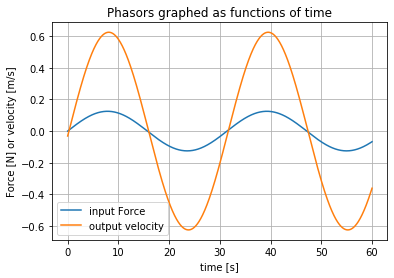

In [2]:
import matplotlib.pyplot as plt

# create a time array to last for 1 minute
t = np.linspace(0, 60, 1000)

# the Force phasor is F_g, use the exponential form of a sin/cos wave
F_t = (F_g/2)*np.exp(1j*w*t)+(np.conjugate(F_g)/2)*np.exp(-1j*w*t)

# the velocity phasor is v_jw, use the exponential form of a sin/cos wave
v_t = (v_jw/2)*np.exp(1j*w*t)+(np.conjugate(v_jw)/2)*np.exp(-1j*w*t)

plt.plot(t, F_t.real)
plt.plot(t, v_t.real)
plt.legend(['input Force', 'output velocity'])
plt.xlabel('time [s]')
plt.ylabel('Force [N] or velocity [m/s]')
plt.title('Phasors graphed as functions of time')
plt.grid()

## 2.3.4 The Phasor method at various frequencies

The code cells above can be used to calculate the output Phasor vaule  
at different frequencies just by changing the value of $\omega$ in the code cell  
  
The table below has been provided for various values of $\omega$  
You can try running the code cell yourself to verify the table  

|$\omega$|phasor magnitude|phasor angle|
|---|---|---|
|0.01|0.625|-90.1|
|0.02|0.625|-90.3|
|0.1|0.625|-91.4|
|0.2|0.624|-92.9|
|1|0.606|-104.0|
|2|0.559|-116.6|
|10|0.232|-158.2|
|20|0.123|-168.7|
|100|0.025|-177.7|
|200|0.012|-178.9|
|1000|0.002|-179.8|
  
(the slowest $\omega$ in the table has you moving the board up and down once every 10 minutes)  
If you move the board up and down very slowly, the velocity and force sin waves remain approximately in phase  
and the velocity magnitude never gets faster than 0.625 [m/s]  
(Remember, we are not modeling static friction, we are modeling Stokes' drag  
You may think of a ball rolling on the board, instead of a block)  
  
(the fastest $\omega$ in the table has you moving the board up and down at the incredible rate of 160 times a second!)  
When you move the board very fast, the block barely moves, only gaining a velocity of 2 [mm/s]  
It makes sense that when you move the board up and down very fast the block doesn't have time to gain speed  
The block's velocity also lags behind the force, travelling it's fastest right in the center of the board  
  
Let's make a graph of the results  

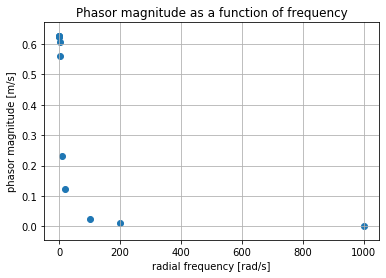

In [3]:
w_values = [0.01, 0.02, 0.1, 0.2, 1, 2, 10, 20, 100, 200, 1000]
w_values = np.array(w_values)
ph_mag = [0.625, 0.625, 0.625, 0.624, 0.606, 0.559, 0.232, 0.123, 0.025, 0.012, 0.002]
ph_mag = np.array(ph_mag)
plt.scatter(w_values, ph_mag)
plt.xlabel('radial frequency [rad/s]')
plt.ylabel('phasor magnitude [m/s]')
plt.title('Phasor magnitude as a function of frequency')
plt.grid()

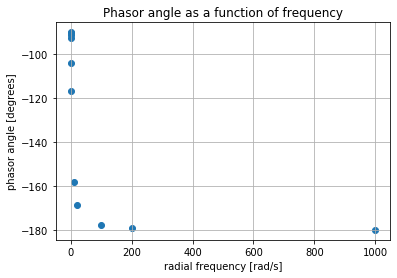

In [4]:
ph_angle = [-90.1, -90.3, -91.4, -92.9, -104.0, -116.6, -158.2, -168.7, -177.7, -178.9, -179.8]
ph_angle = np.array(ph_angle)
plt.scatter(w_values, ph_angle)
plt.xlabel('radial frequency [rad/s]')
plt.ylabel('phasor angle [degrees]')
plt.title('Phasor angle as a function of frequency')
plt.grid()

## 2.3.5 Log - log scale

You can see the graphs above and they appear to be squished to the right and to the bottom  
It turns out that our perception of frequency covers a very large range  
  
For example, consider the image shown below of a piano keyboard with the frequency each key makes in [Hz]  
The frequencies don't increase in a linear fashion, they get bigger faster, the farther you move to the right  
  
![image4!](./images_s2/image_2_3_4.png)  
  
However, they increase by a linear amount on the log scale  
  
Consider the keys for the note "A"  
They have frequencies of [55, 110, 220, 440, 880, 1760, 3520]  
The log values are [1.74, 2.04, 2.34, 2.64, 2.94, 3.24, 3.54]  
  
The log values increase by the same amount, 0.3, so the frequencies would appear equally spaced on log paper  

Now consider the signal produced by the piano.  It is a sound pressure wave, which has a sound pressure level  
How do we measure sound pressure level?  
The chart below shows the sound pressure level measured in dB, which is a log scale  
  
![image5!](./images_s2/image_2_3_5.png)  

If we consider the piano as a linear system,  
our perception of both the frequencies and the signals  
are much suited to log scales  
  
The cells below repeat the graphs for the magnitude and phase of the velocity phasors,  
but using log-log scales

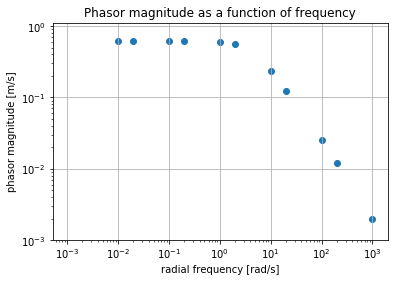

In [5]:
w_values = [0.01, 0.02, 0.1, 0.2, 1, 2, 10, 20, 100, 200, 1000]
w_values = np.array(w_values)
ph_mag = [0.625, 0.625, 0.625, 0.624, 0.606, 0.559, 0.232, 0.123, 0.025, 0.012, 0.002]
ph_mag = np.array(ph_mag)
# plot the magnitude with log-log scale
plt.scatter(w_values, ph_mag)
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin = 0.001)
plt.xlabel('radial frequency [rad/s]')
plt.ylabel('phasor magnitude [m/s]')
plt.title('Phasor magnitude as a function of frequency')
plt.grid()

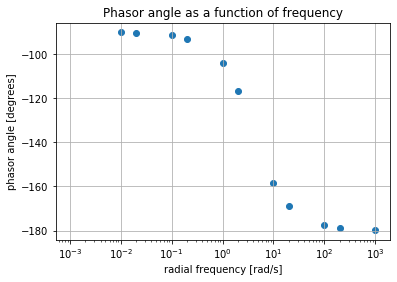

In [6]:
ph_angle = [-90.1, -90.3, -91.4, -92.9, -104.0, -116.6, -158.2, -168.7, -177.7, -178.9, -179.8]
ph_angle = np.array(ph_angle)
plt.scatter(w_values, ph_angle)
# plot the angle linearly, only change the frequency axis to log
plt.xscale('log')
plt.xlabel('radial frequency [rad/s]')
plt.ylabel('phasor angle [degrees]')
plt.title('Phasor angle as a function of frequency')
plt.grid()

The figures are much more appealing when using the log scales  
  
Notice the apparent "over flat then down" shape of the magnitude plot  
  
And the very apparent "over flat, change by $90^\circ$, then over flat" shape of the phase plot  
  
These shapes universally make up the magnitude and phase plots for linear systems

## 2.3.6 The decibel scale

The decibel scale is named for Alexander Bell.  The "deci" prefix comes from the metric system  
So the unit is actually the bel and the bel is defined as the log of power gain  
[decibel](https://en.wikipedia.org/wiki/Decibel)  
  
The most import thing to remember is that the decibel scale is a log scale  
For the signals we are studying, the decibel is defined as  
$$decibel\equiv20\;log(signal)$$  
The old piece of log-log paper shown below should clarify the relationship between the value and dB  
  
![image6!](./images_s2/image_2_3_6.png)  

## 2.3.7 The Bode plot

You have already seen the magnitude and phase Bode plots in the figures above.  
  
The magnitude Bode plot is the magnitude of a signal versus frequency on log-log paper  
However, it is always plotted as decibels on the y-axis  
  
The phase Bode plot is the phase of the signal versus frequency on semi-log paper
  
So if we have already made the plots, what's new?  
  
Python's lti object automatically generates the Bode plots.

In the code below, we will generate the Bode plots automatically using Python's lti object  
  
We will also plot the points we calculated on top of the Bode plot figures, so we can compare  
you should see that the Bode plot is nothing more than the Phasor method at a number of various frequencies  

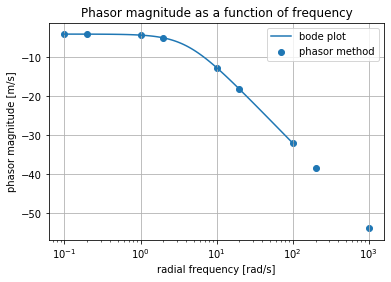

In [7]:
import scipy.signal as sig

num = [(1/m)*-1j*2.5*m] # multiply the numerator of the transfer function by input phasor
den = [1, b/m] # the denominator of the transfer function
v_s = sig.lti(num,den)

# the Bodeplot method returns the frequencies, the magnitudes in dB, and the phase angles
w, mag, angle = v_s.bode()

plt.plot(w, mag)
# scale the values computed using the phasor method to dB
plt.scatter(w_values, 20*np.log10(ph_mag))
plt.xscale('log')
plt.xlabel('radial frequency [rad/s]')
plt.ylabel('phasor magnitude [m/s]')
plt.legend(['bode plot', 'phasor method'])
plt.title('Phasor magnitude as a function of frequency')
plt.grid()

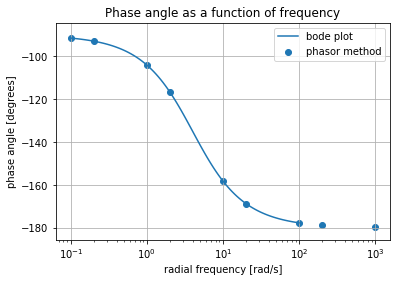

In [8]:
plt.plot(w, angle)
plt.scatter(w_values, ph_angle)
plt.xscale('log')
plt.xlabel('radial frequency [rad/s]')
plt.ylabel('phase angle [degrees]')
plt.legend(['bode plot', 'phasor method'])
plt.title('Phase angle as a function of frequency')
plt.grid()

The Bode plot is named for Hendrik Bode.  
The actual work by Hendrik Bode is about approximating the plots above using very simple straight lines  
[Bode plot](https://en.wikipedia.org/wiki/Bode_plot)
  
The need for the approximation method has been replaced by computers,  
but the key awareness about the shapes of the figures is still very critical knowledge  
  
We have seen the magnitude Bode plot has a shape of "over flat then down"  
and the phase Bode plot has a shape of "over flat, change by $90^\circ$, then over flat"  